In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 1: Data Preprocessing
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/feeds_data.csv')

In [4]:
print(df.head())

                  created_at  entry_id  Temperature  Humidity Heat index  \
0  2022-03-24T14:11:05+05:30       1.0         33.0      15.0  30.68\n\n   
1  2022-03-24T14:11:35+05:30       2.0         33.1      16.0  30.81\n\n   
2  2022-03-24T14:11:50+05:30       3.0         33.1      16.0  30.81\n\n   
3  2022-03-24T14:12:05+05:30       4.0         33.1      15.0  30.77\n\n   
4  2022-03-24T14:12:35+05:30       5.0         33.1      16.0  30.81\n\n   

   pH Level of Nutrient Solution    Location  \
0                            5.6  Greenhouse   
1                            5.6  Greenhouse   
2                            5.6  Greenhouse   
3                            5.6  Greenhouse   
4                            5.6  Greenhouse   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2          

In [5]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

                      created_at  entry_id  Temperature  Humidity Heat index  \
41549  2022-05-22T23:34:30+05:30   41555.0          0.0       0.0     0.00\n   
41550  2022-05-20T08:32:14+05:30   41546.0         29.9      55.0  31.72\n\n   
41551  2022-05-20T08:31:29+05:30   41545.0         29.9      56.0  31.90\n\n   

       pH Level of Nutrient Solution    Location  \
41549                            5.8  Greenhouse   
41550                            5.8  Greenhouse   
41551                            5.8  Greenhouse   

       Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  \
41549                                                1.2          
41550                                                1.2          
41551                                                1.2          

       Number of Plants Type of Hydroponics System plant type   crop stage  \
41549                50                        NFT    Lettuce  germination   
41550                50                      

In [6]:
# Handle missing values (if any)
# For simplicity, we'll fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)


<ipython-input-6-823e99f46224>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [7]:
print(df.head())

                  created_at  entry_id  Temperature  Humidity Heat index  \
0  2022-03-24T14:11:05+05:30       1.0         33.0      15.0  30.68\n\n   
1  2022-03-24T14:11:35+05:30       2.0         33.1      16.0  30.81\n\n   
2  2022-03-24T14:11:50+05:30       3.0         33.1      16.0  30.81\n\n   
3  2022-03-24T14:12:05+05:30       4.0         33.1      15.0  30.77\n\n   
4  2022-03-24T14:12:35+05:30       5.0         33.1      16.0  30.81\n\n   

   pH Level of Nutrient Solution    Location  \
0                            5.6  Greenhouse   
1                            5.6  Greenhouse   
2                            5.6  Greenhouse   
3                            5.6  Greenhouse   
4                            5.6  Greenhouse   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2          

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Location', 'Type of Hydroponics System', 'plant type', 'crop stage'])


In [10]:
print(df.head())


                 created_at  entry_id  Temperature  Humidity Heat index  \
0 2022-03-24 14:11:05+05:30       1.0         33.0      15.0  30.68\n\n   
1 2022-03-24 14:11:35+05:30       2.0         33.1      16.0  30.81\n\n   
2 2022-03-24 14:11:50+05:30       3.0         33.1      16.0  30.81\n\n   
3 2022-03-24 14:12:05+05:30       4.0         33.1      15.0  30.77\n\n   
4 2022-03-24 14:12:35+05:30       5.0         33.1      16.0  30.81\n\n   

   pH Level of Nutrient Solution  \
0                            5.6   
1                            5.6   
2                            5.6   
3                            5.6   
4                            5.6   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2                                                1.2                       50   
3       

In [11]:
# Drop columns that are not relevant for prediction (if any)
df = df.drop(['created_at','entry_id'], axis=1)

In [12]:
print(df.head())


   Temperature  Humidity Heat index  pH Level of Nutrient Solution  \
0         33.0      15.0  30.68\n\n                            5.6   
1         33.1      16.0  30.81\n\n                            5.6   
2         33.1      16.0  30.81\n\n                            5.6   
3         33.1      15.0  30.77\n\n                            5.6   
4         33.1      16.0  30.81\n\n                            5.6   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2                                                1.2                       50   
3                                                1.2                       50   
4                                                1.2                       50   

   Water Usage(Litres)  Location_Greenhouse  Type of Hydroponics System_NFT  \
0            

In [13]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test contain your feature data


In [14]:
# Standardize numerical variables (Temperature, Humidity, Heat index, pH Level)
scaler = StandardScaler()
df[['Temperature', 'Humidity', 'Heat index', 'pH Level of Nutrient Solution']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'Heat index', 'pH Level of Nutrient Solution']])


In [15]:
print(df.head())


   Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
0     1.089380 -1.245913   -0.020880                      -2.347946   
1     1.139572 -1.183096    0.026430                      -2.347946   
2     1.139572 -1.183096    0.026430                      -2.347946   
3     1.139572 -1.245913    0.011873                      -2.347946   
4     1.139572 -1.183096    0.026430                      -2.347946   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2                                                1.2                       50   
3                                                1.2                       50   
4                                                1.2                       50   

   Water Usage(Litres)  Location_Greenhouse  Type of Hydroponics System_NFT  \
0      

In [16]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

       Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
41549   -15.473921 -2.188171  -11.186011                       0.425904   
41550    -0.466567  1.266773    0.357599                       0.425904   
41551    -0.466567  1.329590    0.423105                       0.425904   

       Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  \
41549                                                1.2          
41550                                                1.2          
41551                                                1.2          

       Number of Plants  Water Usage(Litres)  Location_Greenhouse  \
41549                50               141.05                    1   
41550                50               141.05                    1   
41551                50               141.05                    1   

       Type of Hydroponics System_NFT  plant type_Lettuce  \
41549                               1                   1   
41550                          

In [17]:
# Assuming df is your DataFrame

# Check for missing values
missing_values = df['Water Usage(Litres)'].isna().sum()
print(f'Number of missing values in Water Usage: {missing_values}')

# Fill missing values with a default value (e.g., 0)
df['Water Usage(Litres)'].fillna(0, inplace=True)

# Check for missing values
missing_values = df['Temperature'].isna().sum()
print(f'Number of missing values in Temperature: {missing_values}')

# Fill missing values with a default value (e.g., 0)
df['Temperature'].fillna(0, inplace=True)

# Check for missing values
missing_values = df['Humidity'].isna().sum()
print(f'Number of missing values in Humidity: {missing_values}')

# Fill missing values with a default value (e.g., 0)
df['Humidity'].fillna(0, inplace=True)


# Check for missing values
missing_values = df['Heat index'].isna().sum()
print(f'Number of missing values in Heat index: {missing_values}')

# Fill missing values with a default value (e.g., 0)
df['Heat index'].fillna(0, inplace=True)


# Extract numerical value from 'Water Usage' column and convert to integer
#df['Water Usage'] = df['Water Usage'].str.extract('(\d+)').astype(int)


Number of missing values in Water Usage: 0
Number of missing values in Temperature: 0
Number of missing values in Humidity: 0
Number of missing values in Heat index: 97


In [18]:
# Assuming df is your DataFrame

# Impute missing values in 'Heat index' with mean
imputer = SimpleImputer(strategy='mean')
df['Heat index'] = imputer.fit_transform(df[['Heat index']])


In [19]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

       Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
41549   -15.473921 -2.188171  -11.186011                       0.425904   
41550    -0.466567  1.266773    0.357599                       0.425904   
41551    -0.466567  1.329590    0.423105                       0.425904   

       Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  \
41549                                                1.2          
41550                                                1.2          
41551                                                1.2          

       Number of Plants  Water Usage(Litres)  Location_Greenhouse  \
41549                50               141.05                    1   
41550                50               141.05                    1   
41551                50               141.05                    1   

       Type of Hydroponics System_NFT  plant type_Lettuce  \
41549                               1                   1   
41550                          

In [20]:
# Impute missing values in Temperature, Humidity, and Heat index
imputer = SimpleImputer(strategy='mean')
df[['Temperature', 'Humidity', 'Heat index']] = imputer.fit_transform(df[['Temperature', 'Humidity', 'Heat index']])


In [21]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['Water Usage(Litres)'], axis=1)
y = df['Water Usage(Litres)']

In [22]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

       Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
41549   -15.473921 -2.188171  -11.186011                       0.425904   
41550    -0.466567  1.266773    0.357599                       0.425904   
41551    -0.466567  1.329590    0.423105                       0.425904   

       Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  \
41549                                                1.2          
41550                                                1.2          
41551                                                1.2          

       Number of Plants  Water Usage(Litres)  Location_Greenhouse  \
41549                50               141.05                    1   
41550                50               141.05                    1   
41551                50               141.05                    1   

       Type of Hydroponics System_NFT  plant type_Lettuce  \
41549                               1                   1   
41550                          

In [23]:
# Step 2: Feature Selection/Engineering
# In this example, we'll use all available features. You can perform more advanced feature selection/engineering as needed.


In [24]:
# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Step 4: Selecting a Model
model = LinearRegression()  # Linear Regression is chosen as an example. You can try different models.


In [26]:
# Step 5: Model Training
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.16853706231030732
Mean Squared Error: 0.0615179660955298
R-squared: 0.9998666095825121


In [28]:
train_score = model.score(X_train, y_train)
val_score = model.score(X_test, y_test)

print(f"Training R-squared: {train_score}")
print(f"Validation R-squared: {val_score}")


Training R-squared: 0.9998657056632712
Validation R-squared: 0.9998666095825121


In [29]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validated R-squared scores: {scores}")


Cross-validated R-squared scores: [-1.61488445e+26  9.99869098e-01  1.37363737e-01 -2.25717344e+25
 -1.66442415e+27]


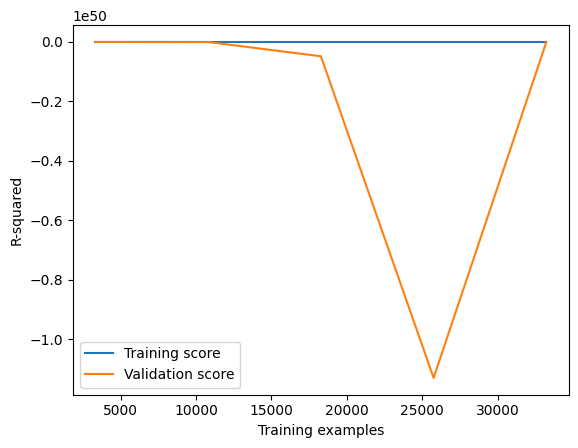

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# Plot learning curves
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.show()


In [31]:
from sklearn.linear_model import Ridge

# Use Ridge regression with regularization
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train)
ridge_val_score = ridge_model.score(X_test, y_test)

print(f"Ridge Training R-squared: {ridge_train_score}")
print(f"Ridge Validation R-squared: {ridge_val_score}")


Ridge Training R-squared: 0.9998656946613436
Ridge Validation R-squared: 0.9998665993444359


In [32]:
# Assuming 'model' is your trained Linear Regression model
coefficients = model.coef_
feature_names = X.columns

# Pair feature names with their coefficients
feature_coefficients = list(zip(feature_names, coefficients))

# Sort features by absolute coefficient value
feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print or inspect the most important features
print("Top Features and Their Coefficients:")
for feature, coefficient in feature_coefficients:
    print(f"{feature}: {coefficient}")


Top Features and Their Coefficients:
crop stage_ideal: -23.697054023914244
crop stage_germination: 23.697054023914212
Humidity: 0.42999445455047836
Heat index: -0.36979987925794267
Temperature: 0.2551682664184665
pH Level of Nutrient Solution: 0.0022644562854419042
Electrical Conductivity (EC) of Nutrient Solution(mS/cm): 3.2949410494754955e-31
Number of Plants: 0.0
Location_Greenhouse: 0.0
Type of Hydroponics System_NFT: 0.0
plant type_Lettuce: 0.0


In [33]:
# Assuming you have a separate test set X_test and y_test
test_score = model.score(X_test, y_test)
print(f"Test R-squared: {test_score}")


Test R-squared: 0.9998666095825121


In [34]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

       Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
41549   -15.473921 -2.188171  -11.186011                       0.425904   
41550    -0.466567  1.266773    0.357599                       0.425904   
41551    -0.466567  1.329590    0.423105                       0.425904   

       Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  \
41549                                                1.2          
41550                                                1.2          
41551                                                1.2          

       Number of Plants  Water Usage(Litres)  Location_Greenhouse  \
41549                50               141.05                    1   
41550                50               141.05                    1   
41551                50               141.05                    1   

       Type of Hydroponics System_NFT  plant type_Lettuce  \
41549                               1                   1   
41550                          

In [35]:
print(df.head(5))

   Temperature  Humidity  Heat index  pH Level of Nutrient Solution  \
0     1.089380 -1.245913   -0.020880                      -2.347946   
1     1.139572 -1.183096    0.026430                      -2.347946   
2     1.139572 -1.183096    0.026430                      -2.347946   
3     1.139572 -1.245913    0.011873                      -2.347946   
4     1.139572 -1.183096    0.026430                      -2.347946   

   Electrical Conductivity (EC) of Nutrient Solution(mS/cm)  Number of Plants  \
0                                                1.2                       50   
1                                                1.2                       50   
2                                                1.2                       50   
3                                                1.2                       50   
4                                                1.2                       50   

   Water Usage(Litres)  Location_Greenhouse  Type of Hydroponics System_NFT  \
0      

In [36]:
# Assuming 'X_train' is your DataFrame used for training
features_used = X_train.columns.tolist()

print("Features used during training:")
for feature in features_used:
    print(feature)


Features used during training:
Temperature
Humidity
Heat index
pH Level of Nutrient Solution
Electrical Conductivity (EC) of Nutrient Solution(mS/cm)
Number of Plants
Location_Greenhouse
Type of Hydroponics System_NFT
plant type_Lettuce
crop stage_germination
crop stage_ideal


In [37]:
import pandas as pd

# Assuming X_new is a DataFrame
X_new = pd.DataFrame({
    'Temperature': [25.0, 28.0, 30.0],
    'Humidity': [60, 65, 70],
    'Heat index': [27.0, 29.0, 32.0],
    'pH Level of Nutrient Solution': [6.5, 6.8, 7.0],
    'Electrical Conductivity (EC) of Nutrient Solution(mS/cm)': [1.2, 1.3, 1.4],
    'Number of Plants': [50, 50, 50],
    'Location_Greenhouse': [1, 0, 1],
    'Type of Hydroponics System_NFT': [1, 0, 1],
    'plant type_Lettuce':[0, 1, 0],
    'crop stage_germination': [0, 1, 0],
    'crop stage_ideal': [0, 1, 0],

    # Add other features as needed
})

# Now, you can use your trained model to make predictions
predictions = model.predict(X_new)


In [38]:
print(predictions)

[139.38780432 141.56436097 143.11572303]


In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 3: Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")

Training Mean Squared Error: 0.06122860539661239
Testing Mean Squared Error: 0.0615179660955298


In [40]:
r_squared = r2_score(y_test, y_test_pred)

print(f"R-squared (coefficient of determination): {r_squared}")

R-squared (coefficient of determination): 0.9998666095825121


In [41]:
print(len(y_test), len(predictions))


8311 3
